In [2]:
import numpy as np

import sys

sys.path.append('../scripts')

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from elements import *

import measurement as me

In [29]:
import matplotlib.pyplot as plt
%matplotlib notebook

## Define typical optomechanical system

In [93]:
omega_c1 = 4e9*np.pi*2
omega_c2 = 6e9*np.pi*2

kappa_0 = 0.3e6*np.pi*2
kappa_ex = 0.2e6*np.pi*2

omega_m = 5e6*np.pi*2
gamma_m = 100*np.pi*2

P_in1 = 1e-9
P_in2 = 1e-9

g_0 = 100*np.pi*2

omega_drive1 = omega_c1 - 0 * omega_m
omega_drive2 = omega_c2 - 0.5 * omega_m

from DCnonlinearities import optomechanics

omdir1 = optomechanics(P_in1, kappa_0, kappa_ex, omega_c1, omega_drive1, omega_m, g_0)

g1= omdir1['g']
#omega_c1 = omdir1['omega_c']

omdir2 = optomechanics(P_in2, kappa_0, kappa_ex, omega_c2, omega_drive2, omega_m, g_0)

g2= omdir2['g']
#omega_c2 = omdir2['omega_c']

a1 = Mode('a1', omega_c1)
a2 = Mode('a2', omega_c2)
b = Mode('b', omega_m)

a1_inex = Input('ex', a1, kappa_ex, kind = 'drive', omega_drive = omega_drive1, bath_temp=30e-3)
a1_in0 = Input('0', a1, kappa_0, kind = 'bath', bath_temp=30e-3)

a2_inex = Input('ex', a2, kappa_ex, kind = 'drive', omega_drive = omega_drive2, bath_temp=30e-3)
a2_in0 = Input('0', a2, kappa_0, kind = 'bath', bath_temp=30e-3)

b_in0 = Input('0', b, gamma_m, kind = 'bath', bath_temp=30e-3)

g_a1b = Coupling(a1, b, g1 * np.array([1,1]))
g_a2b = Coupling(a2, b, g2 * np.array([1,1]))

sys_om = System([a1, a2, b], [b_in0 ,a1_in0, a1_inex,a2_in0, a2_inex], [g_a1b, g_a2b])

## Measure mechanical sidebands

In [94]:
a1_outex = Output(sys_om, a1_inex)

omegas = np.linspace(omega_drive1 - 1.5*omega_m, omega_drive1 + 1.5*omega_m, 10000)

spec = np.array([me.spectrum(a1_outex,omega, components=True) for omega in omegas])

<IPython.core.display.Javascript object>


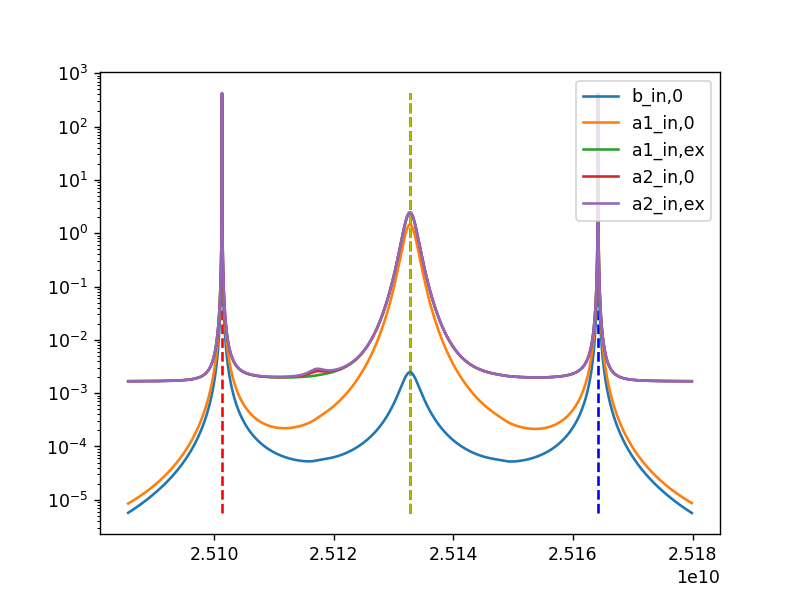

In [95]:
plt.figure()

for i, inp in enumerate(sys_om.inputs):
    plt.semilogy(omegas, spec[:,i], label = str(inp))
plt.vlines([omega_drive1 - omega_m, omega_drive1, omega_drive1 + omega_m, omega_c1],  np.min(spec), np.max(spec),colors=['r','black', 'b', 'y'], linestyles='--')
plt.legend()